In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from skimage import filters

In [2]:
def show(image, ejes="off"):
  plt.imshow(image, cmap="gray")
  plt.axis(ejes)
  plt.show()

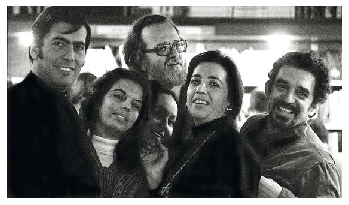

In [3]:
caras = plt.imread("letras.jpg")
show(caras)

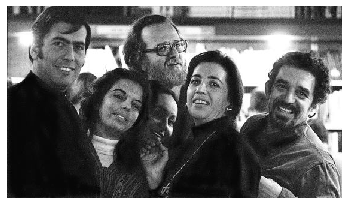

In [4]:
caras_gris = cv.cvtColor(caras, cv.COLOR_BGR2GRAY)
show(caras_gris)

In [5]:
# utilizamos la cascada frontalface default de opencv y ajustamos los
# parametros para que detecte el mayor numero de rostos posibles.
cascade_path = 'haarcascade_frontalface_default.xml'
classifier = cv.CascadeClassifier(cascade_path)
faces_detected = classifier.detectMultiScale(caras_gris,
                                             scaleFactor=1.163145,
                                             minNeighbors=1,
                                             flags=cv.CASCADE_SCALE_IMAGE,
                                             minSize=(60, 60),
                                             maxSize=(100, 100))

In [11]:
# encerramos dentro de un rectangulo los rostros detectados
photo1 = caras.copy()
for(x, y, l, a) in faces_detected:
    photo1 = cv.rectangle(photo1, (x, y), (x+l, y+a), (212, 172, 13), 2)
    region_gaussian = cv.GaussianBlur(photo1[y:y+l, x:x+a], (11, 11), 13)
    photo1[y:y + l, x:x + a] = region_gaussian

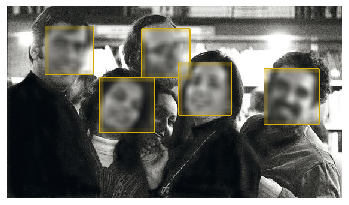

In [12]:
show(photo1)

In [13]:
photo2 = caras.copy()

In [14]:
# funcion para que la imagen pueda rotar
def rotate_image(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv.INTER_LINEAR)
    return result

In [15]:
for(x, y, l, a) in faces_detected:
    photo2 = cv.rectangle(photo2, (x, y), (x+l, y+a), (212, 172, 13), 2)
    region = photo2[y:y+l, x:x+a]
    region = rotate_image(region, 180)
    
    photo2[y:y + l, x:x + a] = region

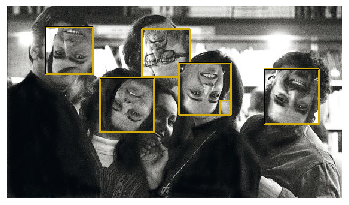

In [16]:
show(photo2)